# Neural Networks Learning

**Defining the cost function for our neural network. **
 
 The cost function we use for the neural network is going to be a generalization of the one that we use for logistic regression. For logistic regression we used to minimize the cost function $J(\theta)$ that was $-\frac{1}{m}$ of this cost function and
 then plus this extra regularization term here, where this was a sum from J=1 through n, because we did not regularize the bias term $\theta_0$. 
 
 For a neural network, our cost function is going to be a generalization of this. Where instead of having basically just one, which is the compression output unit, we may instead have K of them. 
 
 So here's our cost function. 
 $$J(\Theta) = -\frac{1}{m} \bigg[\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log (h_\Theta(x^{(i)}))_k + (1 - y_k^{(i)}\log(1 - (h_\Theta(x^{(i)}))_k) \bigg] + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}(\Theta_{ji}^{(l)})^2$$

 Our new network now outputs vectors in $R^K$, so $h_\Theta(x) \in R^K$, where R might be equal to 1 if we have a binary classification problem. 
 - I'm going to use this notation $(h_\Theta(x))_i$ to denote the ith output. That is, $h_\Theta(x)$ is a k-dimensional vector and so this subscript i just selects out the ith element of the vector that is output by my neural network. 
 
 My cost function $J(\Theta)$ is now going to be the following. 
 - $-\frac{1}{m}$ of a similar term to what we have for logistic regression, except that we have the sum from K = 1 through K. This summation is basically a sum over my K output. So if I have four output units, that is if the final layer of my neural network has four output units, then this is a sum from k =1 through four of basically the logistic regression algorithm's cost function but summing that cost function over each of my four output units in turn. And so you notice in particular that this applies to $y_k, (h_\Theta(x^{(i)}))_k$, because we're basically taking the K upper  units, and comparing that to the value of $y_k$ which is that one of those vectors saying what cost it should be, for example: $y_k = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$
 - And finally, **the second term here is the regularization term**, similar to what we had for the logistic regression. This summation term looks really complicated, but all it's doing is it's summing over these terms $\Theta_{ji}^{(l)}$ for all values of i, j and l. 
     - Except that we don't sum over the terms corresponding to these bias values, $\Theta_0, $like we have for logistic regression. Completely, we don't sum over the terms responding to where i = 0. So that is because when we're computing the activation of a neuron, we have terms like these $\Theta_{i0}^{(2)}x_0 + \Theta_{i1}^{(2)}x_1 + ...$. And so the values with a zero there, that corresponds to something that multiplies into an $x_0$ or an $a_0$. And so this is kinda like a bias unit and by analogy to what we were doing for logistic regression, we won't sum over those terms in our regularization term because we don't want to regularize them and string their values as zero. 
     - But this is just one possible convention, and even if you were to sum over i = 0 up to $S_l$, it would work about the same and doesn't make a big difference. But maybe this convention of not regularizing the bias term is just slightly more common. 

<img src="image/2.2-a.png" alt="drawing" width="360">

## Prepairing data for NN

In [1]:
# %load ../../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
#%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')

### Load MATLAB datafiles

In [2]:
data = loadmat('data/ex4data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
y = data['y']
# Add intercept
X = np.c_[np.ones((data['X'].shape[0],1)), data['X']]

print('X:',X.shape, '(with intercept)')
print('y:',y.shape)

X: (5000, 401) (with intercept)
y: (5000, 1)


In [4]:
weights = loadmat('data/ex3weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [6]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print('theta1 :', theta1.shape)
print('theta2 :', theta2.shape)
params = np.r_[theta1.ravel(), theta2.ravel()]
print('params :', params.shape)

theta1 : (25, 401)
theta2 : (10, 26)
params : (10285,)


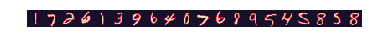

In [7]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

Let's make an example with Neural Network includes: <br>
Input layer size = 400 (20x20 pixels) <br>
Hidden layer size = 25 <br>
Number of labels = 10

### Neural Networks - Putting it together
<img src="image/2.2-b.png" alt="drawing" width="460">
<img src="image/2.2-c.png" alt="drawing" width="460">
<img src="image/2.2-d.png" alt="drawing" width="460">
Cost Function of NN
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\big[-y^{(i)}_{k}\, log\,(( h_\theta\,(x^{(i)}))_k)-(1-y^{(i)}_k)\,log\,(1-h_\theta(x^{(i)}))_k)\big]$$

Here's the Regularized cost function that we wrote down
 $$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\big[-y^{(i)}_{k}\, log\,(( h_\theta\,(x^{(i)}))_k)-(1-y^{(i)}_k)\,log\,(1-h_\theta(x^{(i)}))_k)\big] + 
\frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}(\Theta_{ji}^{(l)})^2$$

Regularized Cost Function (with theta_1 and theta_2 in this example)
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\bigg[-y^{(i)}_{k}\, log\,(( h_\theta\,(x^{(i)}))_k)-(1-y^{(i)}_k)\,log\,(1-h_\theta(x^{(i)}))_k)\bigg] + \frac{\lambda}{2m}\bigg[\sum_{j=1}^{25}\sum_{k=1}^{400}(\Theta_{j,k}^{(1)})^2+\sum_{j=1}^{10}\sum_{k=1}^{25}(\Theta_{j,k}^{(2)})^2\bigg]$$

In [8]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

#### Sigmoid gradient
#### $$ g'(z) = g(z)(1 - g(z))$$
where $$ g(z) = \frac{1}{1+e^{-z}}$$

In [9]:
def sigmoidGradient(z):
    return(sigmoid(z)*(1-sigmoid(z)))

In [10]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, features, classes, reg):
    
    # When comparing to Octave code note that Python uses zero-indexed arrays.
    # But because Numpy indexing does not include the right side, the code is the same anyway.
    theta1 = nn_params[0:(hidden_layer_size*(input_layer_size+1))].reshape(hidden_layer_size,(input_layer_size+1))
    theta2 = nn_params[(hidden_layer_size*(input_layer_size+1)):].reshape(num_labels,(hidden_layer_size+1))

    m = features.shape[0]
    y_matrix = pd.get_dummies(classes.ravel()).as_matrix() # 5000x10
    
    # Feedforward
    # Cost
    a1 = features # 5000x401
        
    z2 = theta1.dot(a1.T) # 25x401 * 401x5000 = 25x5000 
    a2 = np.c_[np.ones((features.shape[0],1)),sigmoid(z2.T)] # 5000x26 
    
    z3 = theta2.dot(a2.T) # 10x26 * 26x5000 = 10x5000 
    a3 = sigmoid(z3) # 10x5000
    
    J = -1*(1/m)*np.sum((np.log(a3.T)*(y_matrix)+np.log(1-a3).T*(1-y_matrix))) + \
        (reg/(2*m))*(np.sum(np.square(theta1[:,1:])) + np.sum(np.square(theta2[:,1:])))

    # Back propogation
    # Gradients
    d3 = a3.T - y_matrix # 5000x10
    d2 = theta2[:,1:].T.dot(d3.T)*sigmoidGradient(z2) # 25x10 *10x5000 * 25x5000 = 25x5000
    
    delta1 = d2.dot(a1) # 25x5000 * 5000x401 = 25x401
    delta2 = d3.T.dot(a2) # 10x5000 *5000x26 = 10x26
    
    theta1_ = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_ = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    
    theta1_grad = delta1/m + (theta1_*reg)/m
    theta2_grad = delta2/m + (theta2_*reg)/m
    
    return(J, theta1_grad, theta2_grad)

In [11]:
# Regularization parameter = 0
nnCostFunction(params, 400, 25, 10, X, y, 0)[0]

/home/annguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


0.28762916516131887

In [12]:
# Regularization parameter = 1
nnCostFunction(params, 400, 25, 10, X, y, 1)[0]

/home/annguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


0.3837698590909236

In [13]:
[sigmoidGradient(z) for z in [-1, -0.5, 0, 0.5, 1]]

[0.19661193324148185,
 0.2350037122015945,
 0.25,
 0.2350037122015945,
 0.19661193324148185]